# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        #city_date = dt.datetime.utcnow().strftime('%Y-%m-%d')

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | xilin hot
Processing Record 4 of Set 1 | cidreira
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | salekhard
Processing Record 7 of Set 1 | terenos
Processing Record 8 of Set 1 | kalispell
Processing Record 9 of Set 1 | sawakin
Processing Record 10 of Set 1 | mata-utu
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | nyurba
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | malanville
Processing Record 15 of Set 1 | san luis de la loma
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | igarka
Processing Record 19 of Set 1 | ust-nera
Processing Record 20 of Set 1 | nova sintra
Processing Record 21 of Set 1 | portland
Processing Record 22 of Set 1 | hamilton


Processing Record 39 of Set 4 | wailua homesteads
Processing Record 40 of Set 4 | port alfred
Processing Record 41 of Set 4 | kosh-agach
Processing Record 42 of Set 4 | saynshand
Processing Record 43 of Set 4 | flying fish cove
Processing Record 44 of Set 4 | port alberni
Processing Record 45 of Set 4 | comodoro rivadavia
Processing Record 46 of Set 4 | merizo village
Processing Record 47 of Set 4 | arkhangel'sk
Processing Record 48 of Set 4 | college
Processing Record 49 of Set 4 | knyaze-volkonskoye
Processing Record 0 of Set 5 | conception bay south
Processing Record 1 of Set 5 | cockburn town
Processing Record 2 of Set 5 | al ghayzah
Processing Record 3 of Set 5 | houghton
Processing Record 4 of Set 5 | polatli
Processing Record 5 of Set 5 | ventimiglia
Processing Record 6 of Set 5 | rzhev
Processing Record 7 of Set 5 | constantia
Processing Record 8 of Set 5 | vingt cinq
City not found. Skipping...
Processing Record 9 of Set 5 | champerico
Processing Record 10 of Set 5 | isafjordu

Processing Record 28 of Set 8 | holualoa
Processing Record 29 of Set 8 | tarrafal de sao nicolau
Processing Record 30 of Set 8 | saudarkrokur
Processing Record 31 of Set 8 | jiexiu
Processing Record 32 of Set 8 | sao pedro do sul
Processing Record 33 of Set 8 | cabedelo
Processing Record 34 of Set 8 | nyagan
Processing Record 35 of Set 8 | kolondieba
Processing Record 36 of Set 8 | pohang
Processing Record 37 of Set 8 | khandyga
Processing Record 38 of Set 8 | taitung city
Processing Record 39 of Set 8 | jayapura
Processing Record 40 of Set 8 | china
Processing Record 41 of Set 8 | nogamerzin-yurt
Processing Record 42 of Set 8 | taulaga
Processing Record 43 of Set 8 | agria
Processing Record 44 of Set 8 | doume
Processing Record 45 of Set 8 | sydney
Processing Record 46 of Set 8 | lata
Processing Record 47 of Set 8 | mlowo
Processing Record 48 of Set 8 | taguatinga
Processing Record 49 of Set 8 | bakchar
Processing Record 0 of Set 9 | bulata
Processing Record 1 of Set 9 | manavalakuric

Processing Record 22 of Set 12 | moyale
Processing Record 23 of Set 12 | yaren
Processing Record 24 of Set 12 | sao felix do xingu
Processing Record 25 of Set 12 | gudermes
Processing Record 26 of Set 12 | kabansk
Processing Record 27 of Set 12 | lentvaris
Processing Record 28 of Set 12 | aitape
Processing Record 29 of Set 12 | nicoya
Processing Record 30 of Set 12 | bouarfa
Processing Record 31 of Set 12 | cargados carajos
City not found. Skipping...
Processing Record 32 of Set 12 | rio grande
Processing Record 33 of Set 12 | puerto deseado
Processing Record 34 of Set 12 | dedza
Processing Record 35 of Set 12 | sisimiut
Processing Record 36 of Set 12 | yunyang
Processing Record 37 of Set 12 | kirensk
Processing Record 38 of Set 12 | tromso
Processing Record 39 of Set 12 | owando
Processing Record 40 of Set 12 | antelope
Processing Record 41 of Set 12 | north adams
Processing Record 42 of Set 12 | la sarre
Processing Record 43 of Set 12 | tinajo
Processing Record 44 of Set 12 | raja
Pr

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,71.96,77,0,3.44,US,1691642319
1,port-aux-francais,-49.3500,70.2167,39.18,88,95,23.55,TF,1691642124
2,xilin hot,43.9667,116.0333,85.51,33,74,7.56,CN,1691642319
3,cidreira,-30.1811,-50.2056,61.07,96,100,13.00,BR,1691642320
4,edinburgh of the seven seas,-37.0676,-12.3116,50.59,59,67,22.57,SH,1691642229


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,71.96,77,0,3.44,US,1691642319
1,port-aux-francais,-49.3500,70.2167,39.18,88,95,23.55,TF,1691642124
2,xilin hot,43.9667,116.0333,85.51,33,74,7.56,CN,1691642319
3,cidreira,-30.1811,-50.2056,61.07,96,100,13.00,BR,1691642320
4,edinburgh of the seven seas,-37.0676,-12.3116,50.59,59,67,22.57,SH,1691642229


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

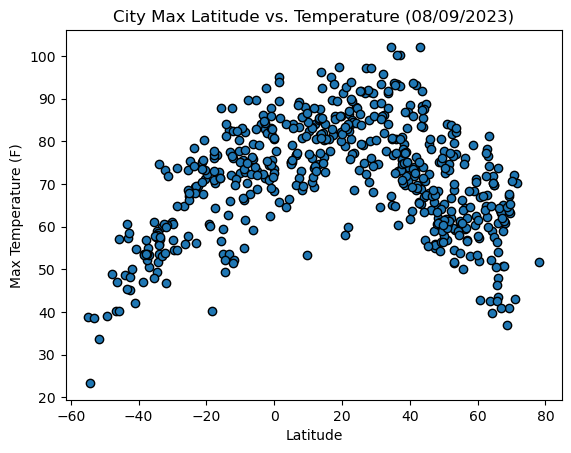

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f'City Max Latitude vs. Temperature ({time.strftime("%m/%d/%Y")})')
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

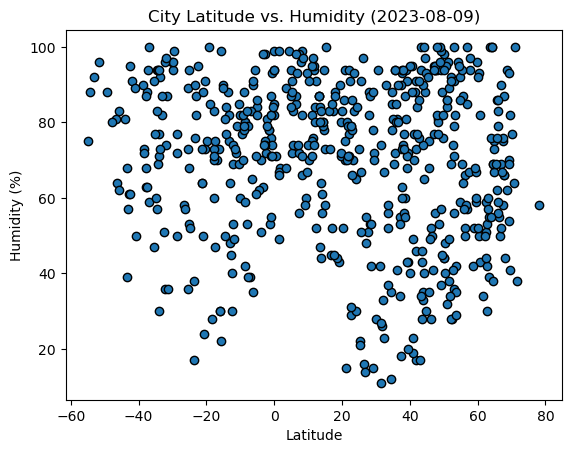

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity ({time.strftime("%Y-%m-%d")})')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

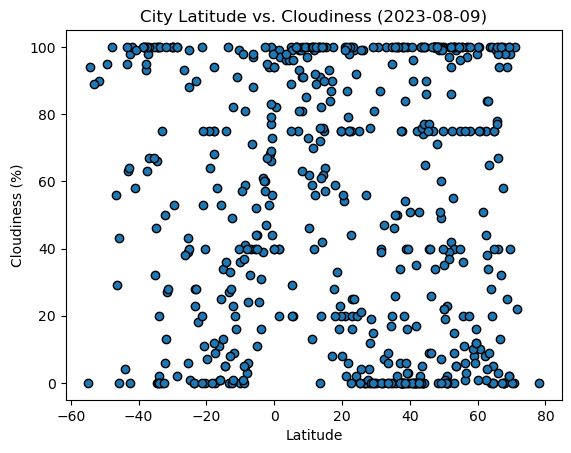

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness ({time.strftime("%Y-%m-%d")})')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

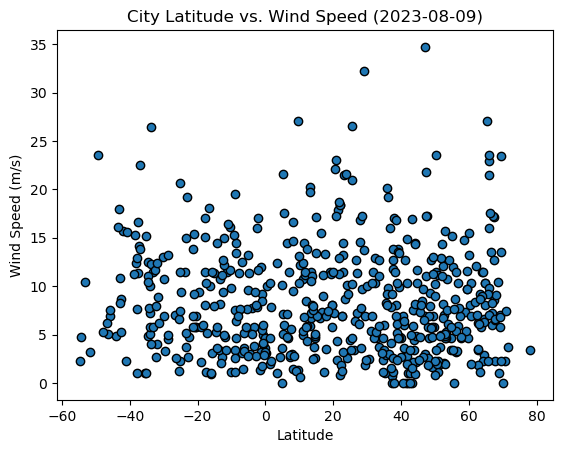

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ({time.strftime("%Y-%m-%d")})')
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,71.96,77,0,3.44,US,1691642319
2,xilin hot,43.9667,116.0333,85.51,33,74,7.56,CN,1691642319
5,salekhard,66.5300,66.6019,63.93,50,13,13.53,RU,1691642196
7,kalispell,48.1958,-114.3129,62.17,81,0,4.61,US,1691642321
8,sawakin,19.1059,37.3321,97.52,43,16,11.45,SD,1691642321


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,39.18,88,95,23.55,TF,1691642124
3,cidreira,-30.1811,-50.2056,61.07,96,100,13.00,BR,1691642320
4,edinburgh of the seven seas,-37.0676,-12.3116,50.59,59,67,22.57,SH,1691642229
6,terenos,-20.4422,-54.8603,71.31,73,0,5.75,BR,1691642320
9,mata-utu,-13.2816,-176.1745,82.67,75,27,10.78,WF,1691642321


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.35654768598543835


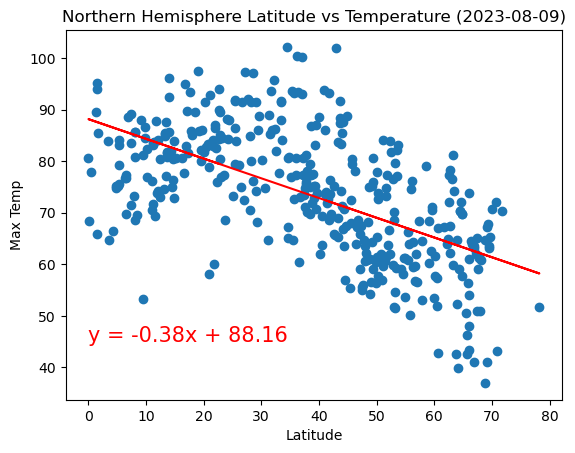

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,45),fontsize=15,color="red")
plt.title(f'Northern Hemisphere Latitude vs Temperature ({time.strftime("%Y-%m-%d")})')
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.6032881281277153


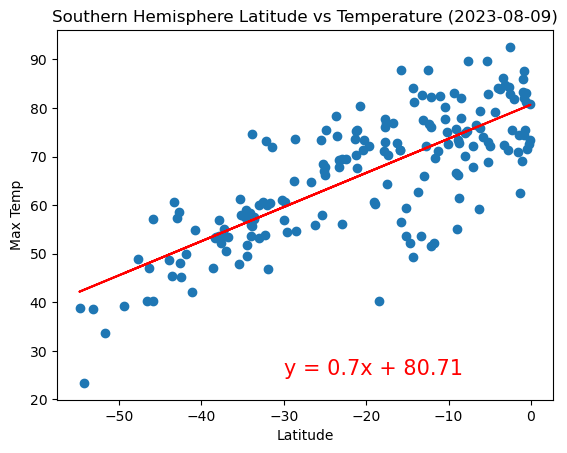

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
plt.title(f'Southern Hemisphere Latitude vs Temperature ({time.strftime("%Y-%m-%d")})')
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In the Northern Hemisphere, as you move more north, the max temperature decreases. However in the Southern Hemisphere, as you move more south, the max temperature increases. This shows that the closer you are to Latitude = 0 the higher the temperature. Temperature and Latitude have a strong correlation to each other.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.019133363972375705


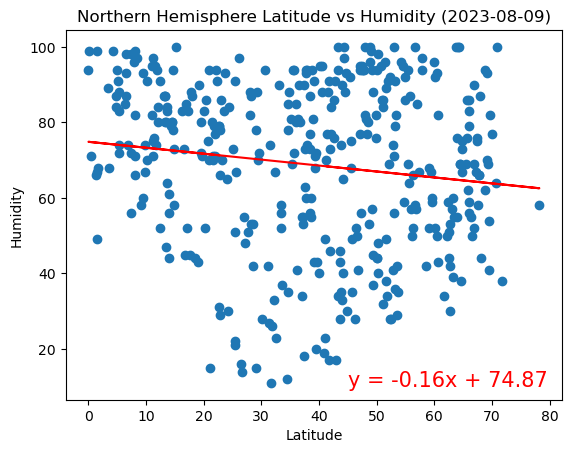

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.title(f'Northern Hemisphere Latitude vs Humidity ({time.strftime("%Y-%m-%d")})')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0034273347046342834


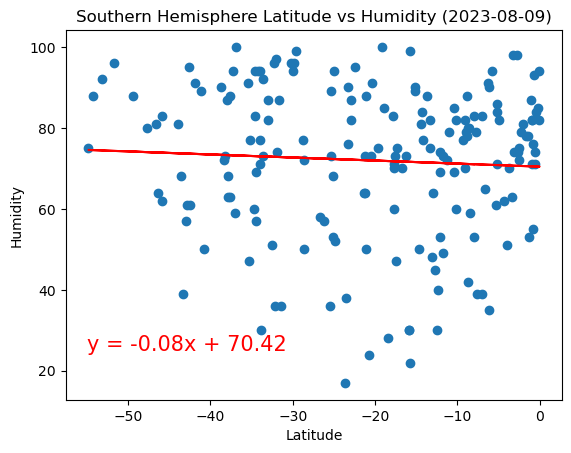

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.title(f'Southern Hemisphere Latitude vs Humidity ({time.strftime("%Y-%m-%d")})')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In both the Northern and Southern Hemispheres with Humidity vs Latitude, the r-squared value is close to 0.00 which shows that there is no correlation. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.027440927734170943


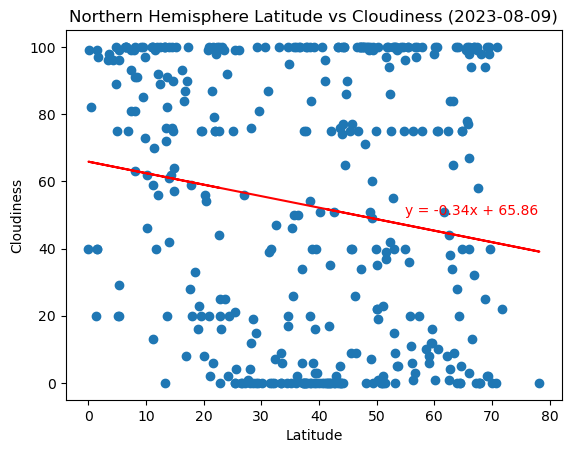

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55,50),fontsize=10,color="red")
plt.title(f'Northern Hemisphere Latitude vs Cloudiness ({time.strftime("%Y-%m-%d")})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.015690757911991995


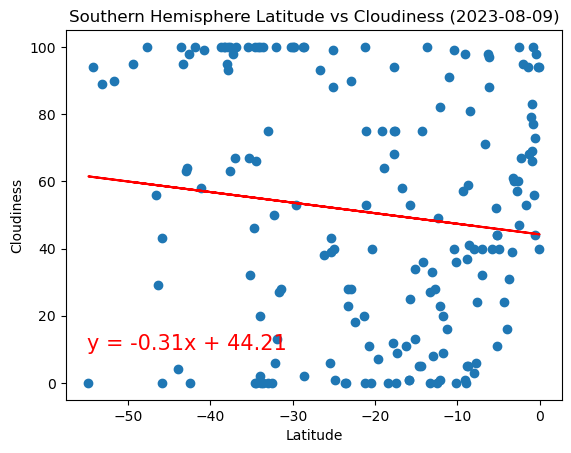

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.title(f'Southern Hemisphere Latitude vs Cloudiness ({time.strftime("%Y-%m-%d")})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In both the Northern and Southern Hemispheres with Cloudiness vs Latitude, the r-squared value is close to 0.02 which shows that there is no correlation. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0010772481698872914


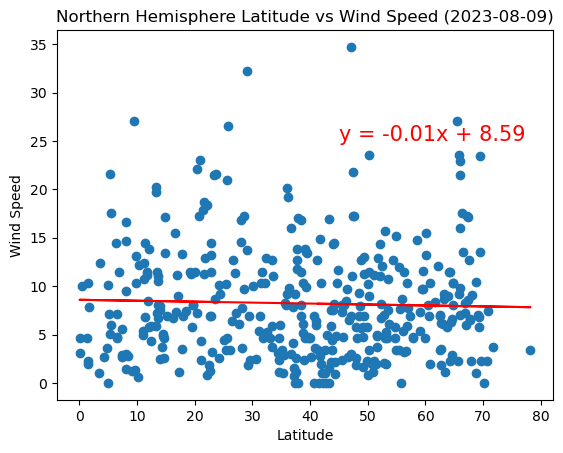

In [21]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,25),fontsize=15,color="red")
plt.title(f'Northern Hemisphere Latitude vs Wind Speed ({time.strftime("%Y-%m-%d")})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.02928303857289112


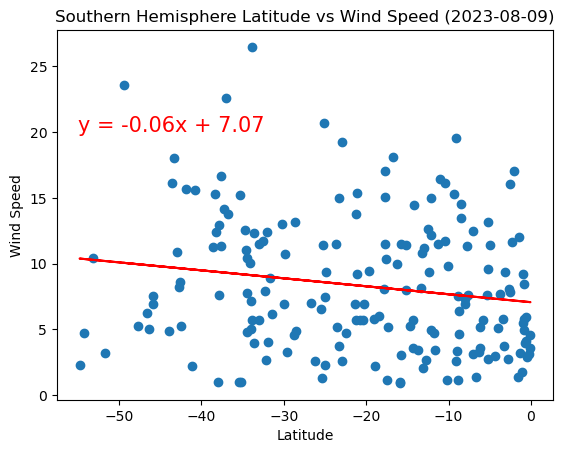

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.title(f'Southern Hemisphere Latitude vs Wind Speed ({time.strftime("%Y-%m-%d")})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In both the Northern and Southern Hemispheres with Cloudiness vs Latitude, the r-squared value is close to 0.0 which shows that there is no correlation. 